In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


#**Data Set**

In [22]:
data = pd.read_csv('data1.csv',sep=',')

In [23]:
data.head()

,IPM_Provinsi,PAGU_prov,Jml_Klg,Klg_Desil1,Jml_Indiv,Indiv_Desil1,IPM_2024
0,DKI JAKARTA,5.955177e+14,734913.0,115642.0,2491291.0,972368.0,83.08
1,JAWA BARAT,4.925309e+13,4913057.0,1144985.0,18114686.0,1120453.0,74.43
2,JAWA TENGAH,4.294761e+13,4574912.0,1204406.0,16176249.0,507546.0,73.88
3,DI YOGYAKARTA,1.529809e+13,528232.0,145328.0,1679054.0,541423.0,81.55
4,JAWA TIMUR,4.882786e+13,5681087.0,1344340.0,18466847.0,417308.0,74.09


# **Eksplorasi** **Data**

In [24]:
# prompt: check type data

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IPM_Provinsi  38 non-null     object 
 1   PAGU_prov     38 non-null     float64
 2   Jml_Klg       38 non-null     float64
 3   Klg_Desil1    38 non-null     float64
 4   Jml_Indiv     38 non-null     float64
 5   Indiv_Desil1  38 non-null     float64
 6   IPM_2024      38 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.2+ KB


In [25]:
# Convert 'IPM_2024' to string type before using .str.replace
data['IPM_2024'] = data['IPM_2024'].astype(str).str.replace(',', '.').astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IPM_Provinsi  38 non-null     object 
 1   PAGU_prov     38 non-null     float64
 2   Jml_Klg       38 non-null     float64
 3   Klg_Desil1    38 non-null     float64
 4   Jml_Indiv     38 non-null     float64
 5   Indiv_Desil1  38 non-null     float64
 6   IPM_2024      38 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.2+ KB


In [26]:
data.describe()

,PAGU_prov,Jml_Klg,Klg_Desil1,Jml_Indiv,Indiv_Desil1,IPM_2024
count,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,38.000000
mean,2.853640e+13,7.836596e+05,1.837141e+05,2.898629e+06,7.913689e+05,72.388421
std,9.532223e+13,1.322834e+06,3.212022e+05,4.589118e+06,1.320482e+06,5.150227
min,8.547117e+11,2.734000e+04,8.741000e+03,1.235840e+05,2.734000e+04,53.420000
25%,6.139466e+12,1.522360e+05,3.834600e+04,6.212258e+05,1.522360e+05,71.080000
50%,9.201041e+12,3.692585e+05,7.044850e+04,1.418378e+06,3.887865e+05,73.180000
75%,1.472406e+13,6.760900e+05,1.773468e+05,2.489658e+06,6.760900e+05,74.345000
max,5.955177e+14,5.681087e+06,1.344340e+06,1.846685e+07,5.681087e+06,83.080000


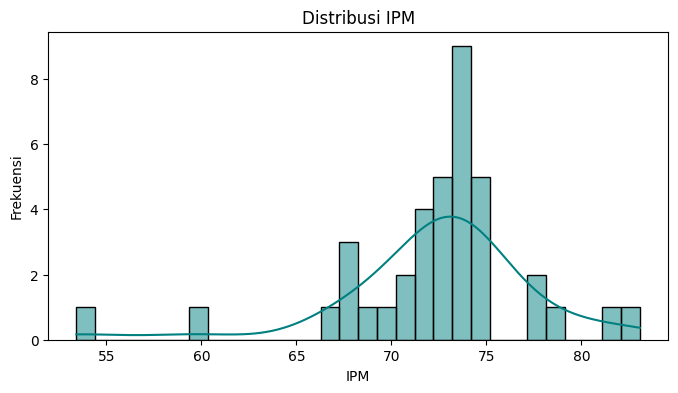

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi target
plt.figure(figsize=(8, 4))
sns.histplot(data['IPM_2024'], kde=True, bins=30, color='teal')
plt.title("Distribusi IPM")
plt.xlabel("IPM")
plt.ylabel("Frekuensi")
plt.show()


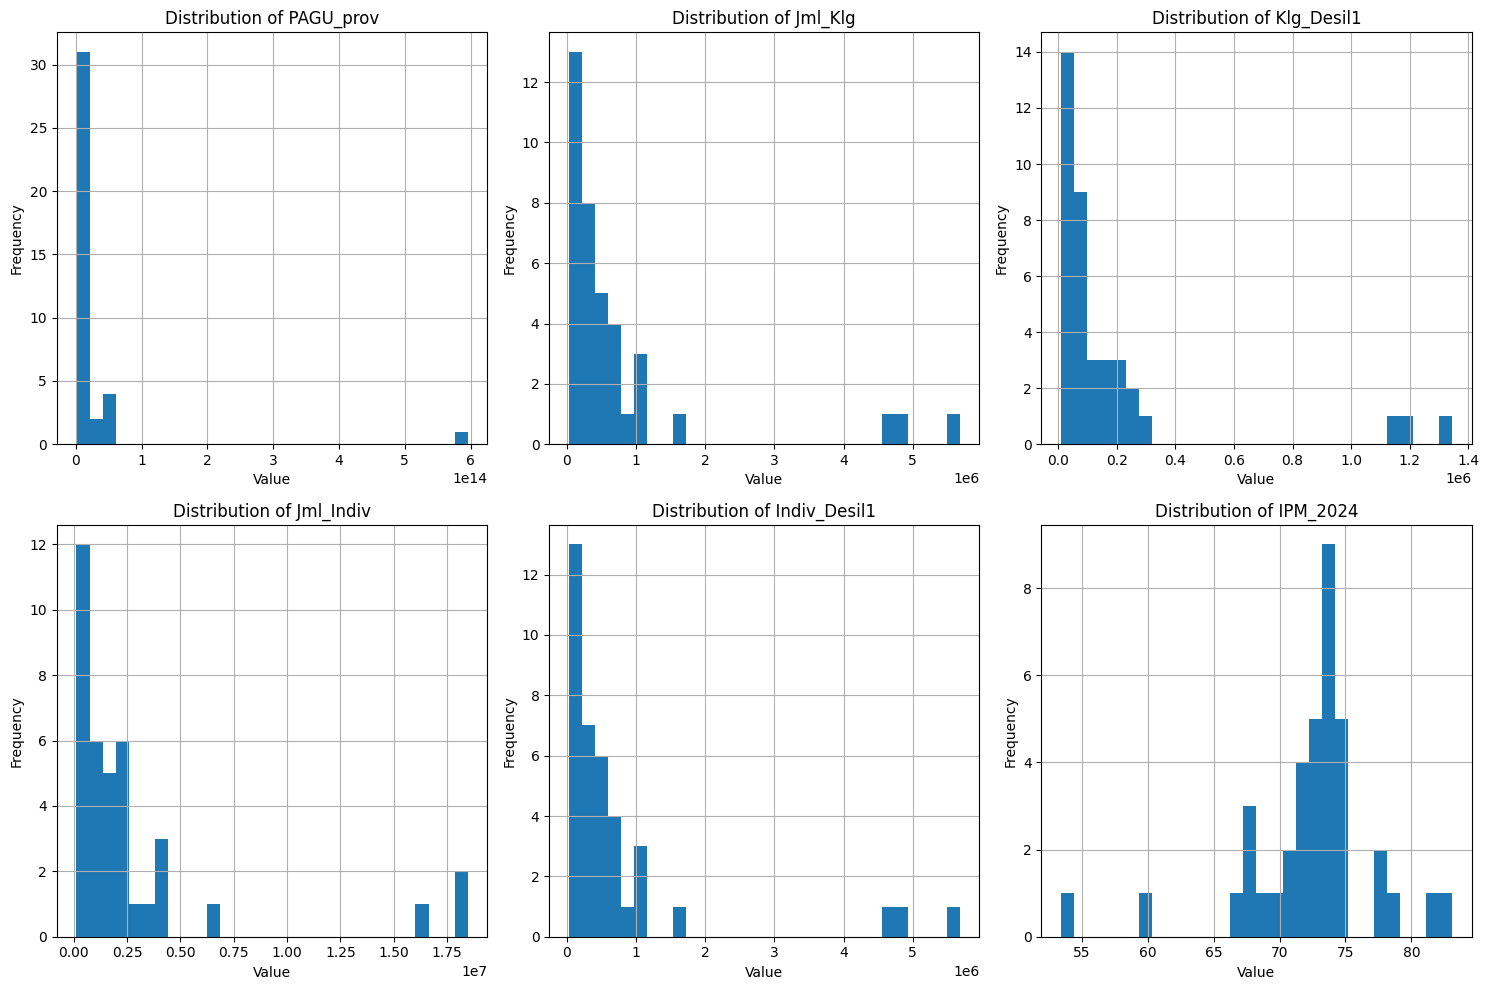

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_numeric_histograms(df, n_cols=3):
    """
    Plot histograms for all numeric columns in a DataFrame.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame
        n_cols (int): Number of columns in the subplot grid
    """
    # Select only numeric columns (float and int)
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # If no numeric columns found
    if len(numeric_cols) == 0:
        print("No numeric columns found in the DataFrame.")
        return
    
    # Calculate grid dimensions
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    
    # Flatten axes array for easy iteration
    axes = axes.ravel() if n_rows * n_cols > 1 else [axes]
    
    # Plot histograms
    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        df[col].hist(ax=ax, bins=30)
        ax.set_title(f'Distribution of {col}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
    
    # Hide unused subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_numeric_histograms(data)

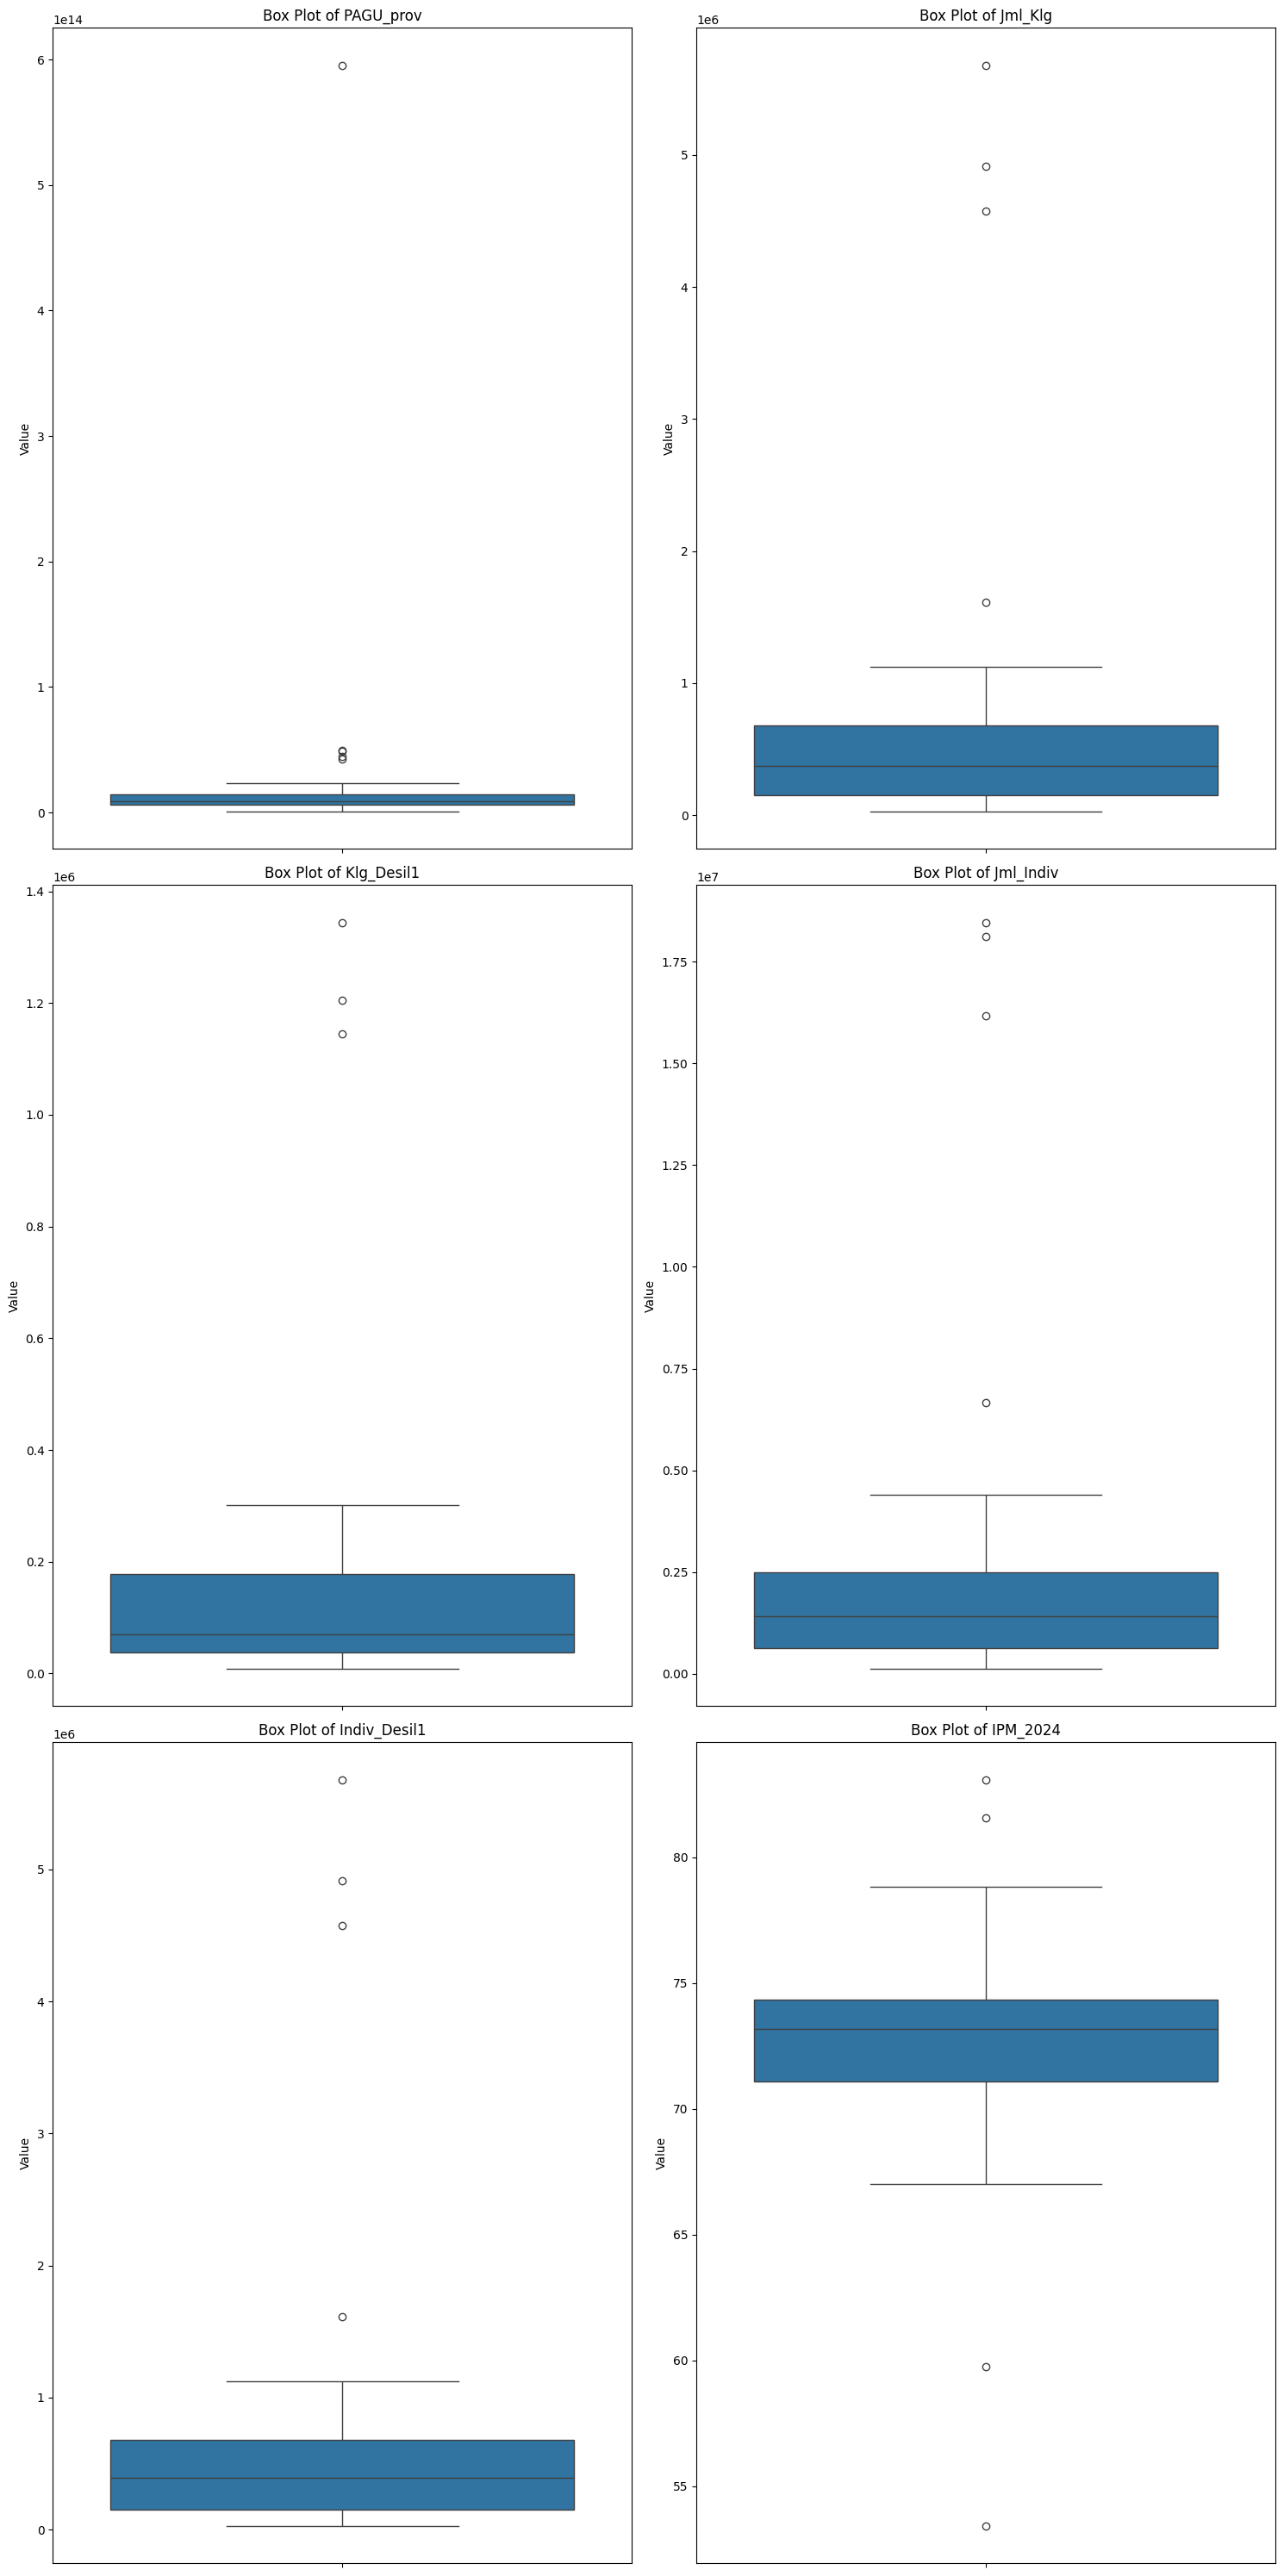

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of columns with float data type
float_columns = [col for col in data.columns if data[col].dtype == 'float64']

# Check if there are any float columns to plot
if not float_columns:
    print("No float64 columns found in the DataFrame.")
else:
    # Create box plots for each float column on a single page
    plt.figure(figsize=(15, 5 * len(float_columns)))  # Dynamic height based on number of columns
    
    # Calculate number of rows needed (2 columns per row)
    n_rows = (len(float_columns) + 1) // 2
    
    for i, col in enumerate(float_columns):
        plt.subplot(n_rows, 2, i + 1)
        sns.boxplot(y=data[col])
        plt.title(f'Box Plot of {col}')
        plt.ylabel('Value')
    
    plt.tight_layout()
    plt.show()

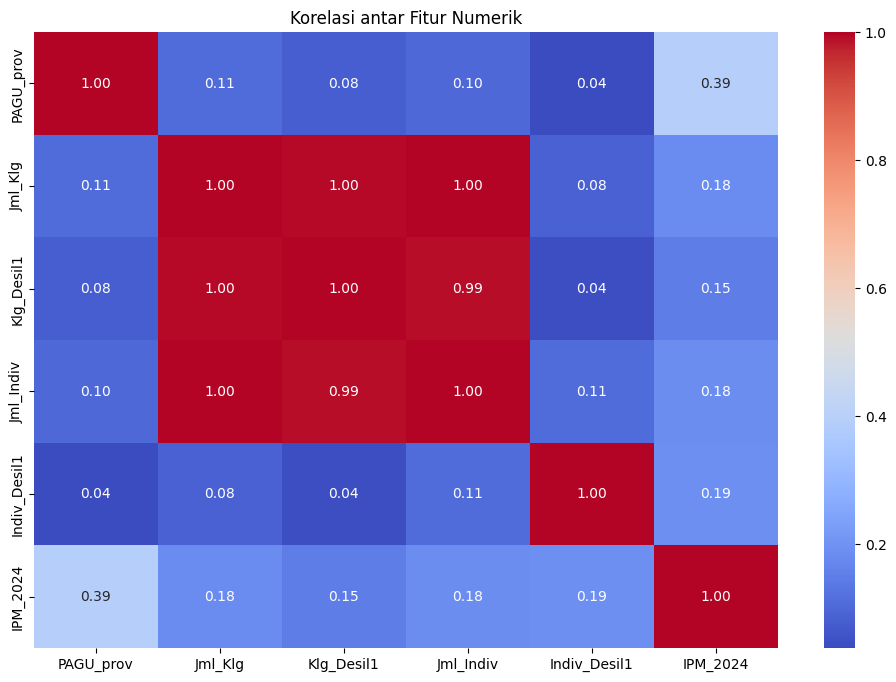

In [30]:
import numpy as np

# Visualisasi korelasi antar fitur numerik
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antar Fitur Numerik")
plt.show()

# **Pre** **Processing** **Data**

In [31]:
columns_to_check = ['PAGU_prov', 'Jml_Klg', 'Klg_Desil1', 'Jml_Indiv', 'Indiv_Desil1', 'IPM_2024']

# 5. Buat salinan data
df_cleaned = data.copy()

# 6. Hapus outlier dengan metode IQR
#for col in columns_to_check:
 #   Q1 = df_cleaned[col].quantile(0.25)
  #  Q3 = df_cleaned[col].quantile(0.75)
   # IQR = Q3 - Q1
    #df_cleaned = df_cleaned[(df_cleaned[col] >= Q1 - 1.5 * IQR) & (df_cleaned[col] <= Q3 + 1.5 * IQR)]

In [32]:
df_cleaned.describe()

,PAGU_prov,Jml_Klg,Klg_Desil1,Jml_Indiv,Indiv_Desil1,IPM_2024
count,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,38.000000
mean,2.853640e+13,7.836596e+05,1.837141e+05,2.898629e+06,7.913689e+05,72.388421
std,9.532223e+13,1.322834e+06,3.212022e+05,4.589118e+06,1.320482e+06,5.150227
min,8.547117e+11,2.734000e+04,8.741000e+03,1.235840e+05,2.734000e+04,53.420000
25%,6.139466e+12,1.522360e+05,3.834600e+04,6.212258e+05,1.522360e+05,71.080000
50%,9.201041e+12,3.692585e+05,7.044850e+04,1.418378e+06,3.887865e+05,73.180000
75%,1.472406e+13,6.760900e+05,1.773468e+05,2.489658e+06,6.760900e+05,74.345000
max,5.955177e+14,5.681087e+06,1.344340e+06,1.846685e+07,5.681087e+06,83.080000


In [33]:
#cek missing values
print(df_cleaned.isnull().sum())

IPM_Provinsi    0
PAGU_prov       0
Jml_Klg         0
Klg_Desil1      0
Jml_Indiv       0
Indiv_Desil1    0
IPM_2024        0
dtype: int64


# **Fitur** **Engineering**

In [34]:
# Create 'efektifitas_label' based on the specified criteria
df_cleaned['efektifitas_label'] = 0  # Initialize the column with 0
df_cleaned.loc[(df_cleaned['PAGU_prov'] < 10000000000000) & (df_cleaned['IPM_2024'] < 75) & (df_cleaned['Klg_Desil1'] < 100000), 'efektifitas_label'] = 1


In [35]:
df_cleaned.head()

,IPM_Provinsi,PAGU_prov,Jml_Klg,Klg_Desil1,Jml_Indiv,Indiv_Desil1,IPM_2024,efektifitas_label
0,DKI JAKARTA,5.955177e+14,734913.0,115642.0,2491291.0,972368.0,83.08,0
1,JAWA BARAT,4.925309e+13,4913057.0,1144985.0,18114686.0,1120453.0,74.43,0
2,JAWA TENGAH,4.294761e+13,4574912.0,1204406.0,16176249.0,507546.0,73.88,0
3,DI YOGYAKARTA,1.529809e+13,528232.0,145328.0,1679054.0,541423.0,81.55,0
4,JAWA TIMUR,4.882786e+13,5681087.0,1344340.0,18466847.0,417308.0,74.09,0


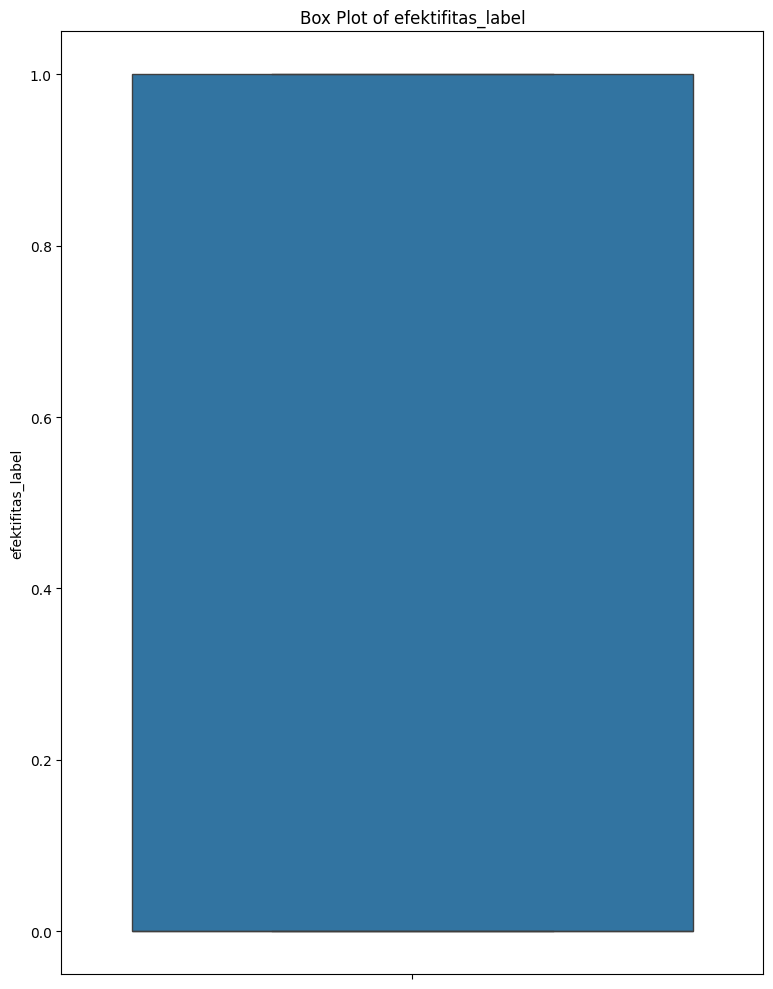

In [36]:
# Create a list of columns with integer data type
int_columns = [col for col in df_cleaned.columns if df_cleaned[col].dtype == 'int64']

# Create box plots for each integer column on a single page
plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, col in enumerate(int_columns):
    plt.subplot(len(int_columns) // 2 + 1, 2, i + 1)  # Adjust subplot layout
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


In [37]:
# Filter data where 'efektifitas_label' is equal to 1
filtered_data = df_cleaned[df_cleaned['efektifitas_label'] == 0]

# Now 'filtered_data' contains only the rows where efektifitas_label is 1
filtered_data


,IPM_Provinsi,PAGU_prov,Jml_Klg,Klg_Desil1,Jml_Indiv,Indiv_Desil1,IPM_2024,efektifitas_label
0,DKI JAKARTA,5.955177e+14,734913.0,115642.0,2491291.0,972368.0,83.08,0
1,JAWA BARAT,4.925309e+13,4913057.0,1144985.0,18114686.0,1120453.0,74.43,0
2,JAWA TENGAH,4.294761e+13,4574912.0,1204406.0,16176249.0,507546.0,73.88,0
3,DI YOGYAKARTA,1.529809e+13,528232.0,145328.0,1679054.0,541423.0,81.55,0
4,JAWA TIMUR,4.882786e+13,5681087.0,1344340.0,18466847.0,417308.0,74.09,0
5,ACEH,1.706159e+13,610108.0,160315.0,2469049.0,734913.0,74.03,0
6,SUMATERA UTARA,2.361188e+13,1613857.0,301238.0,6655732.0,4913057.0,74.02,0
7,SUMATERA BARAT,1.177457e+13,574108.0,93873.0,2306208.0,4574912.0,74.49,0
8,RIAU,8.647786e+12,593935.0,121899.0,2470419.0,528232.0,74.79,0
10,SUMATERA SELATAN,1.958305e+13,972368.0,251779.0,3810911.0,610108.0,72.30,0


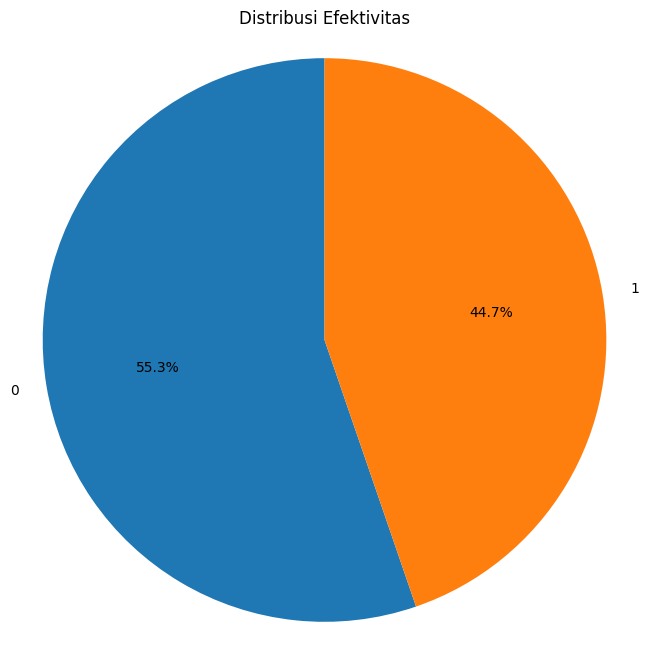

In [38]:
# Group by 'efektivitas' value counts
pie_data = df_cleaned['efektifitas_label'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Efektivitas')
plt.axis('equal')  # Ensures the pie is a circle
plt.show()

In [39]:
#encode variabel kategorik
from sklearn.preprocessing import LabelEncoder

data_encoded = df_cleaned.copy()
le = LabelEncoder()
for col in data_encoded.select_dtypes(include='object').columns:
    data_encoded[col] = le.fit_transform(data_encoded[col])

In [40]:
data_encoded.head()

,IPM_Provinsi,PAGU_prov,Jml_Klg,Klg_Desil1,Jml_Indiv,Indiv_Desil1,IPM_2024,efektifitas_label
0,5,5.955177e+14,734913.0,115642.0,2491291.0,972368.0,83.08,0
1,8,4.925309e+13,4913057.0,1144985.0,18114686.0,1120453.0,74.43,0
2,9,4.294761e+13,4574912.0,1204406.0,16176249.0,507546.0,73.88,0
3,4,1.529809e+13,528232.0,145328.0,1679054.0,541423.0,81.55,0
4,10,4.882786e+13,5681087.0,1344340.0,18466847.0,417308.0,74.09,0


In [41]:
#pemilihan fitur
features = [
    "IPM_Provinsi", "PAGU_prov", "Jml_Klg", "Klg_Desil1", "Jml_Indiv",
    "Indiv_Desil1", "IPM_2024"
]

X = data_encoded[features]
y = data_encoded["efektifitas_label"]

In [42]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Pemodelan**

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [44]:
# CART
cart = DecisionTreeClassifier(random_state=42)
cart.fit(X_train, y_train)
y_pred_cart = cart.predict(X_test)

In [45]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [46]:
# Convert the NumPy array to a Pandas Series for easier viewing
y_pred_rf_series = pd.Series(y_pred_rf)
# Now you can use .head()
print(y_pred_rf_series.head())

0    1
1    1
2    0
3    1
4    1
dtype: int64


# **Evaluasi** **Model**

In [47]:
print("CART:\n", classification_report(y_test, y_pred_cart))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

CART:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.83      1.00      0.91         5

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.93      0.92      0.92        12

Random Forest:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.71      1.00      0.83         5

    accuracy                           0.83        12
   macro avg       0.86      0.86      0.83        12
weighted avg       0.88      0.83      0.83        12



In [48]:
# Stabilitas Model
from sklearn.model_selection import cross_val_score

cv_cart = cross_val_score(cart, X, y, cv=10, scoring='accuracy')
cv_rf = cross_val_score(rf, X, y, cv=10, scoring='accuracy')

print("\nCART CV Mean Accuracy:", cv_cart.mean(), "Std:", cv_cart.std())
print("RF CV Mean Accuracy:", cv_rf.mean(), "Std:", cv_rf.std())



CART CV Mean Accuracy: 0.7833333333333334 Std: 0.15898986690282427
RF CV Mean Accuracy: 0.8583333333333334 Std: 0.1445779297741456


dapat dilihat bahwa random forest menghasilkan model yg lebih konsisten dengan variasi yg lebih kecil dari CART

# **Visualisasi** **Hasil** **dan** **Perbandingan** **Model**

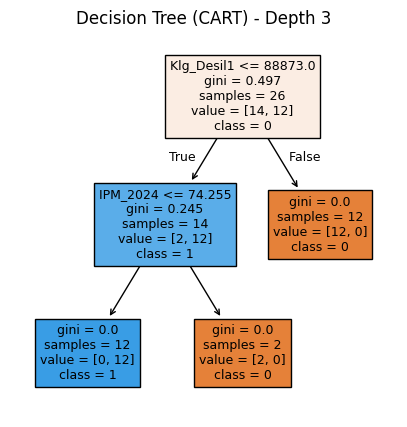

In [55]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(5, 5))
plot_tree(
    cart,
    feature_names=X.columns,
    class_names=[str(cls) for cls in cart.classes_],
    filled=True,
    max_depth=3
)

plt.title("Decision Tree (CART) - Depth 3")
plt.show()


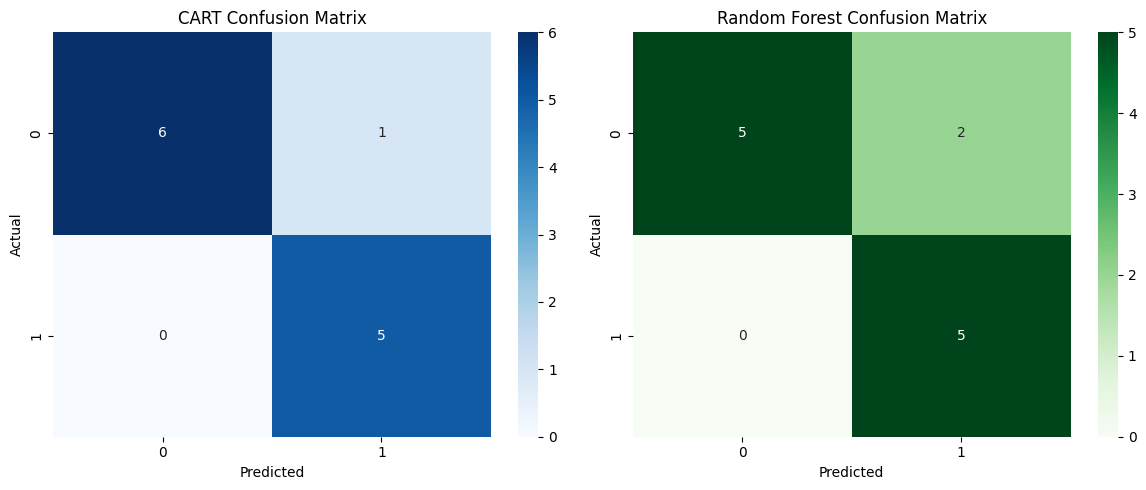

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_cart), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("CART Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


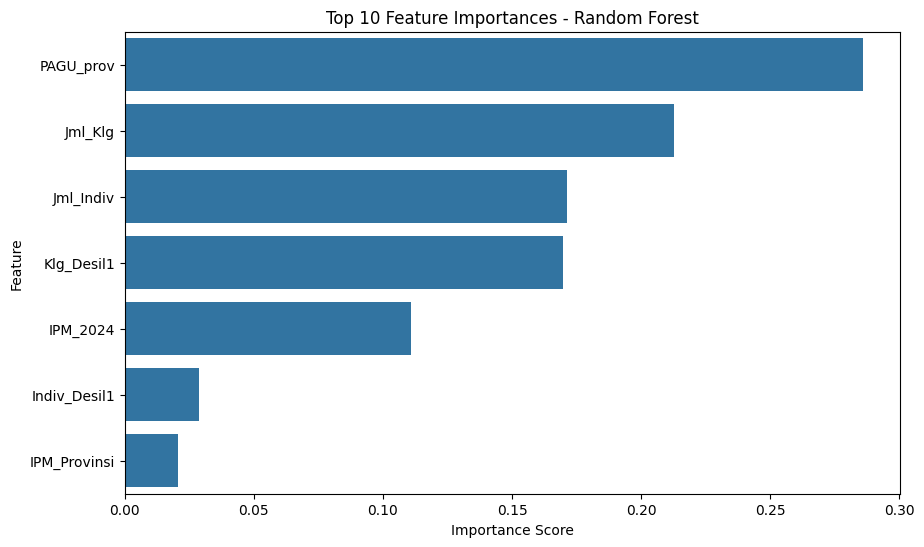

In [51]:
# Feature Importance rf
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

##Kesimpulan

Hasil analisa :

